In [ ]:
url = "https://github.com/Shreyaas14/bac-adv-team/raw/main/stock%200.xlsx"

df = pd.read_excel(url)
df["imbalance_size"] = df["imbalance_size"] * df["imbalance_buy_sell_flag"]
df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,0,0,10,1299772.70,1,1.000026,15261106.63,NaN,NaN,0.999812,13996.50,1.000026,23519.16,0.999892,0.389814,1,0_10_0
2,0,0,20,1299772.70,1,0.999919,15261106.63,NaN,NaN,0.999812,4665.50,0.999919,12131.60,0.999842,4.220009,2,0_20_0
3,0,0,30,1299772.70,1,1.000133,15261106.63,NaN,NaN,1.000026,55998.00,1.000133,46203.30,1.000085,5.450249,3,0_30_0
4,0,0,40,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000241,14655.95,1.000455,26610.45,1.000317,3.169775,4,0_40_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5401,0,98,110,1532025.15,1,1.000731,16105487.38,NaN,NaN,1.000515,18723.38,1.000731,21972.27,1.000615,2.969503,5401,98_110_0
5402,0,98,120,1532025.15,1,1.000731,16105487.38,NaN,NaN,1.000407,10287.48,1.000731,23826.47,1.000505,3.759861,5402,98_120_0
5403,0,98,130,1532025.15,1,1.000731,16105487.38,NaN,NaN,1.000515,16776.89,1.000731,24475.44,1.000603,3.850460,5403,98_130_0
5404,0,98,140,1532025.15,1,1.000731,16105487.38,NaN,NaN,1.000515,21226.01,1.000731,12423.14,1.000651,-0.150204,5404,98_140_0


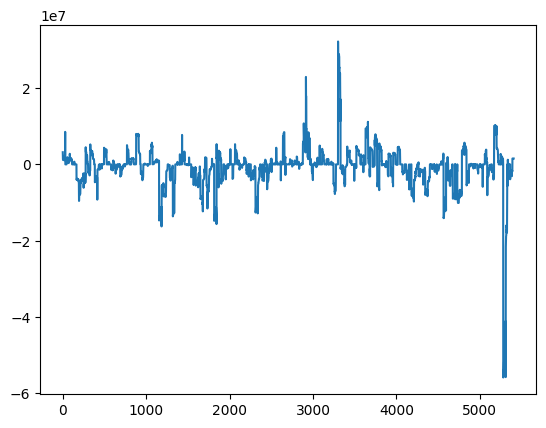

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.loc[:, "imbalance_size"])

In [ ]:
p, d, q = 5, 1, 2

import statsmodels as sm
model = sm.tsa.arima.model.ARIMA(df.loc[0:5000, "imbalance_size"], order=(p,d,q))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:         imbalance_size   No. Observations:                 5001
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -77209.573
Date:                Fri, 17 Nov 2023   AIC                         154435.146
Time:                        00:01:26   BIC                         154487.283
Sample:                             0   HQIC                        154453.419
                               - 5001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0190      0.582     -0.033      0.974      -1.159       1.121
ar.L2         -0.6862      0.538     -1.275      0.202      -1.741       0.369
ar.L3         -0.0664      0.067     -0.996      0.3

In [ ]:
X = df["imbalance_size"]
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:len(X)].reset_index(drop=True)
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = sm.tsa.arima.model.ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print(t, len(test), 'predicted=%f, expected=%f' % (yhat, obs))

0 271 predicted=-36979.224481, expected=0.000000
1 271 predicted=3839.039646, expected=0.000000
2 271 predicted=18400.922719, expected=0.000000
3 271 predicted=-28166.709869, expected=0.000000
4 271 predicted=-0.000000, expected=0.000000
5 271 predicted=0.000000, expected=0.000000
6 271 predicted=0.000000, expected=0.000000
7 271 predicted=-0.000000, expected=0.000000
8 271 predicted=0.000000, expected=-184852.210000
9 271 predicted=-163955.181204, expected=-2031389.520000
10 271 predicted=-1814716.138151, expected=-1278809.190000
11 271 predicted=-1284360.066017, expected=-1173527.330000
12 271 predicted=-1225300.275239, expected=-1187691.210000
13 271 predicted=-1209940.946883, expected=-1182458.700000
14 271 predicted=-1134640.652844, expected=-1216470.060000
15 271 predicted=-1226680.462205, expected=-1216470.060000
16 271 predicted=-1217300.872575, expected=-1232799.120000
17 271 predicted=-1230681.538010, expected=-1215026.600000
18 271 predicted=-1216893.473723, expected=-117885

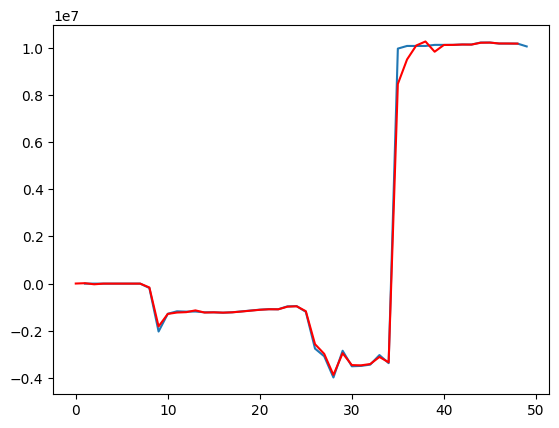

In [ ]:
plt.plot(test[1:50])
plt.plot(predictions[1:50], color='red')
plt.show()